# Text Summarization by `Mr. Harshit Dawar!`

In [14]:
# Importing the required Libraries

import goose3     # For fetching the text from the URL
import spacy
import nltk
# Downloading the stopwords
nltk.download("stopwords")
nltk.download('punkt')
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
model = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harshitdawar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/harshitdawar/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
goose = goose3.Goose()

# Extracting data from the wikopedia article on NLP!
data = goose.extract("https://en.wikipedia.org/wiki/Natural_language_processing")

In [3]:
data.cleaned_text

'Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.\n\nNatural language processing has its roots in the 1950s. Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, a task that involves the automated interpretation and generation of natural language, but at the time not articulated as a problem separate from artificial intelligence.\n\nThe premise 

In [4]:
data.title

'Natural language processing - Wikipedia'

## PreProcessing the Text for multiple use-cases like sentiment analysis or chatbot, etc

In [38]:
def pre_process_text_for_NLP(data):
    # Changing the Data into lowercase
    data = data.lower()
    
    # Removing custom special characters from the Data!
    data = data.replace(".", "")
    data = data.replace("[", "")
    data = data.replace("]", "")
    data = data.replace(",", "")
    data = data.replace("(", "")
    data = data.replace(")", "")
    data = data.replace("{", "")
    data = data.replace("}", "")
    
    # Removing Stopwords, spaces, numbers, & punctuations from the Data!
    processed_data = [
                      token.text for token in model(data) if token.text not in \
                      nltk.corpus.stopwords.words("english") and token.text != "not" and not \
                      (token.is_punct or token.is_space or token.like_num)
                     ]
    
    return " ".join(processed_data)

In [39]:
processed_cleaned_data = pre_process_text_for_NLP(data.cleaned_text)

In [40]:
processed_cleaned_data

'natural language processing nlp subfield linguistics computer science artificial intelligence concerned interactions computers human language particular program computers process analyze large amounts natural language data goal computer capable understanding contents documents including contextual nuances language within technology accurately extract information insights contained documents well categorize organize documents natural language processing roots 1950s already alan turing published article titled computing machinery intelligence proposed called turing test criterion intelligence task involves automated interpretation generation natural language time articulated problem separate artificial intelligence premise symbolic nlp well summarized john searle \'s chinese room experiment given collection rules eg chinese phrasebook questions matching answers computer emulates natural language understanding nlp tasks applying rules data confronted 1950s georgetown experiment involved 

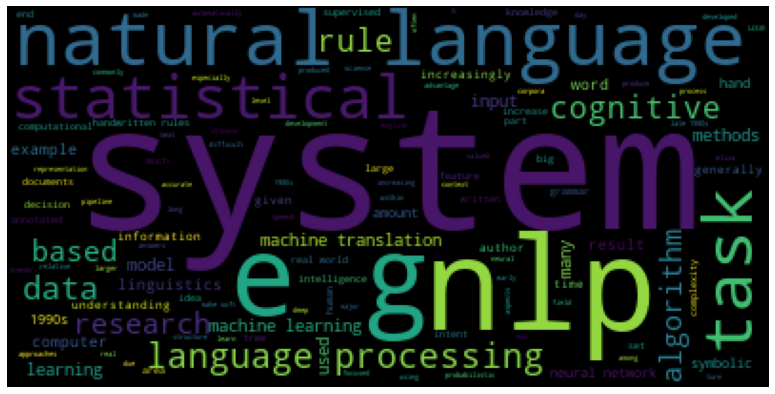

In [32]:
cloud_NLP = WordCloud()
cloud_NLP = cloud_NLP.generate(processed_cleaned_data)
plt.figure(figsize = (15, 7))
plt.imshow(cloud_NLP)
plt.axis("off")
plt.show()

## Text Summarization

### Tokenizing the sentences

In [45]:
sentences = [sentence for sentence in nltk.sent_tokenize(data.cleaned_text)]

In [46]:
sentences

['Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.',
 'The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them.',
 'The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.',
 'Natural language processing has its roots in the 1950s.',
 'Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, a task that involves the automated interpretation and generation of natural language, but at the time not articulated as a problem separate from artificial intelligence.',

In [47]:
# Importing the required libraries for summarisation!

from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.sum_basic import SumBasicSummarizer

In [49]:
# Generating the Summary of the Data!

Text_Parser = PlaintextParser.from_string(data.cleaned_text, Tokenizer("english"))
Summarizer = SumBasicSummarizer()
Data_Summary = Summarizer(Text_Parser.document, int(len(sentences) * 0.35))

In [50]:
# Printing the Summary

Data_Summary

(<Sentence: Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, a task that involves the automated interpretation and generation of natural language, but at the time not articulated as a problem separate from artificial intelligence.>,
 <Sentence: • 1950s: The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English.>,
 <Sentence: Little further research in machine translation was conducted until the late 1980s when the first statistical machine translation systems were developed.>,
 <Sentence: Using almost no information about human thought or emotion, ELIZA sometimes provided a startlingly human-like interaction.>,
 <Sentence: When the "patient" exceeded the very small knowledge base, ELIZA might provide a generic response, for example, responding to "My head hurts" with "Why do you say your head hurt